Initial/Final condition


/autofs/mnt/ncrc-svm1_home2/Gustavo.Marques/python/pyGVtools/m6toolbox.py:43: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  if type( z ) == np.ma.core.MaskedArray: z[z.mask] = 0
/autofs/mnt/ncrc-svm1_home2/Gustavo.Marques/python/pyGVtools/m6toolbox.py:44: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  if type( q ) == np.ma.core.MaskedArray: qmin = np.amin(q); q[q.mask] = qmin


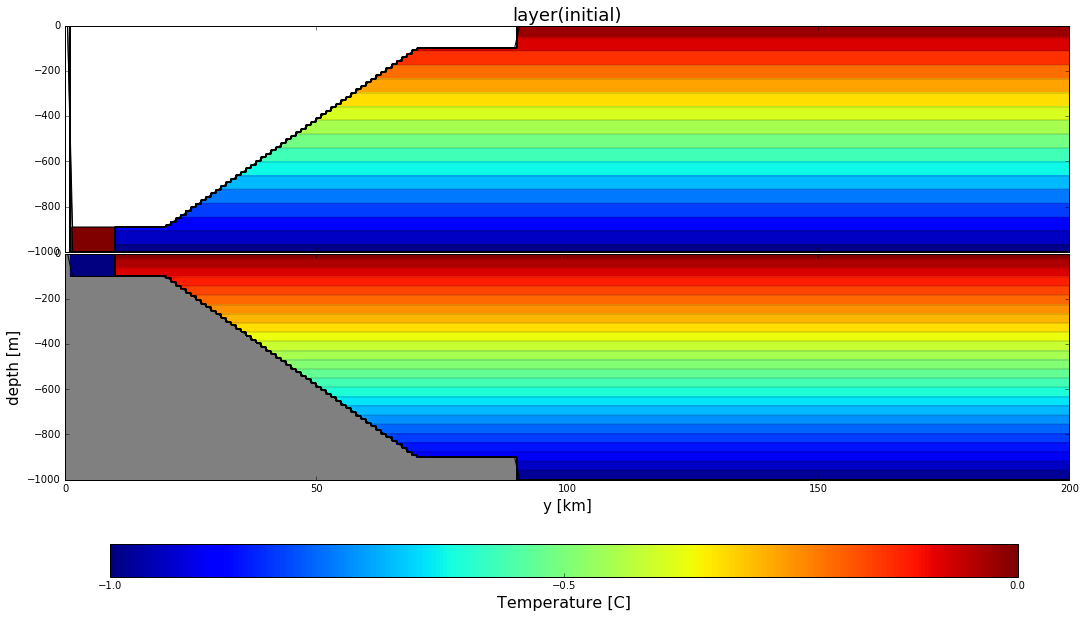

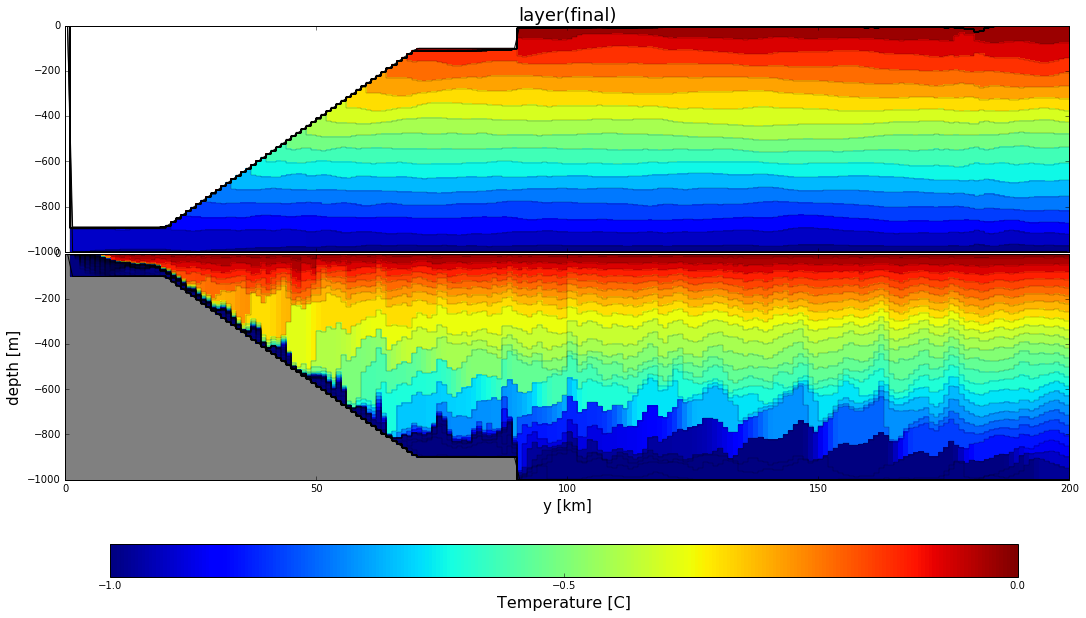

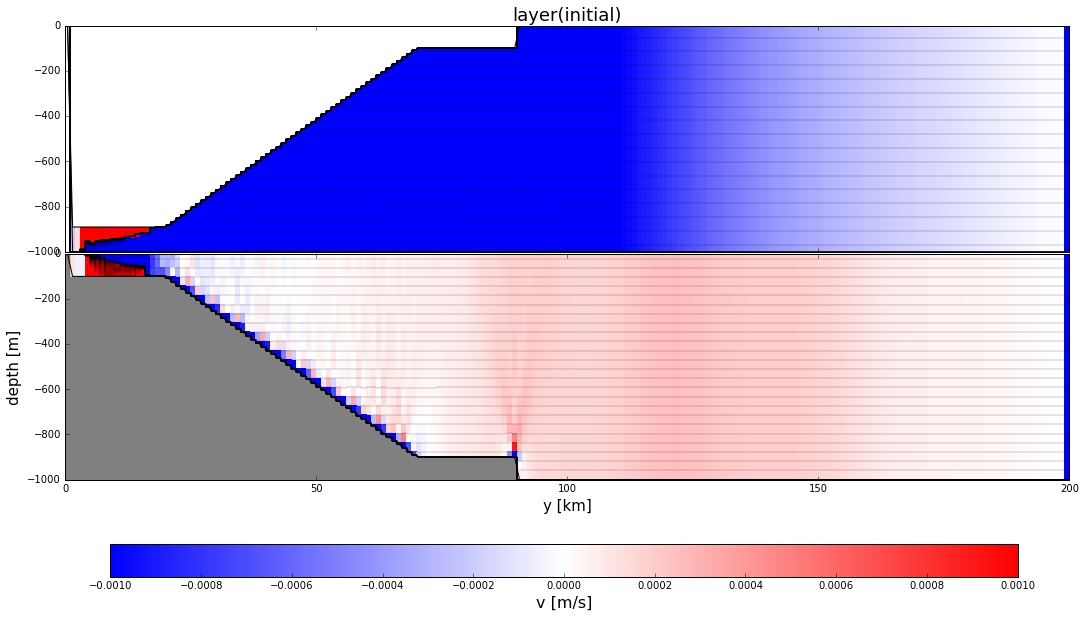

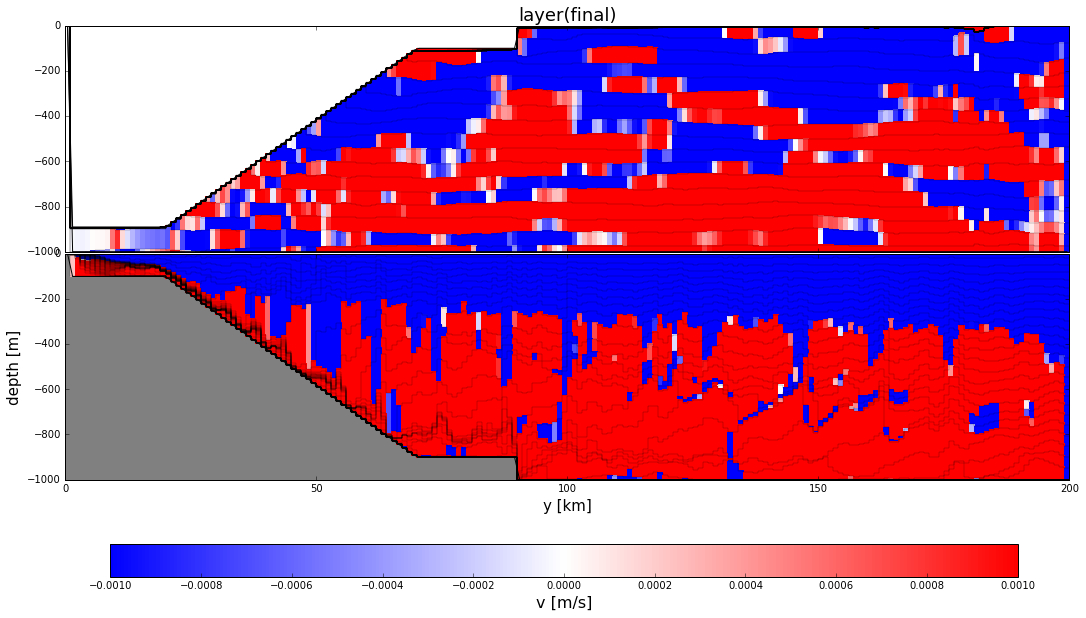

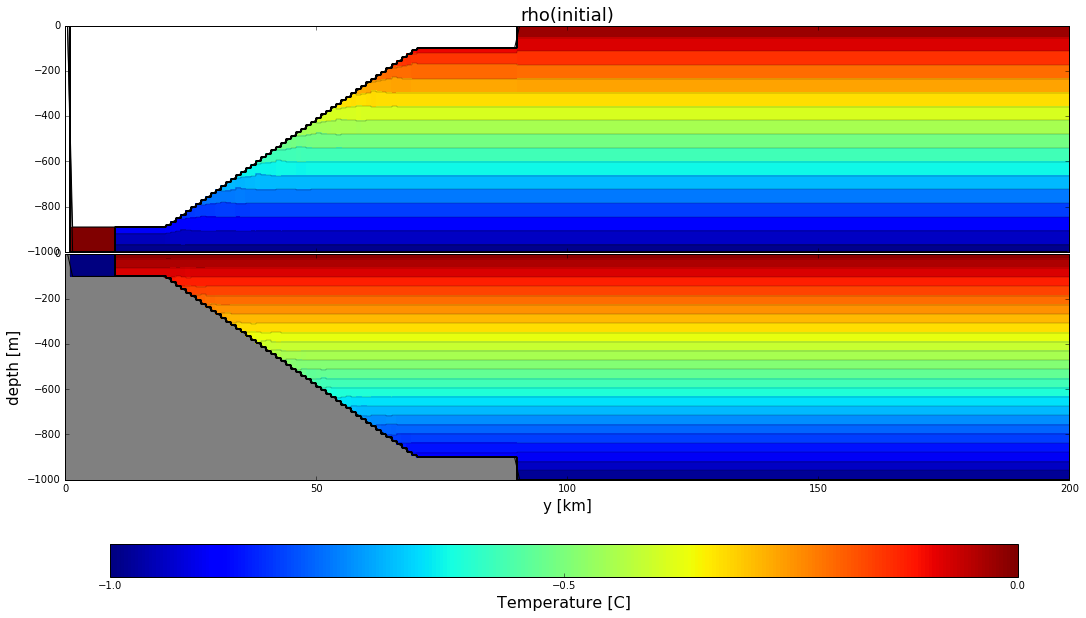

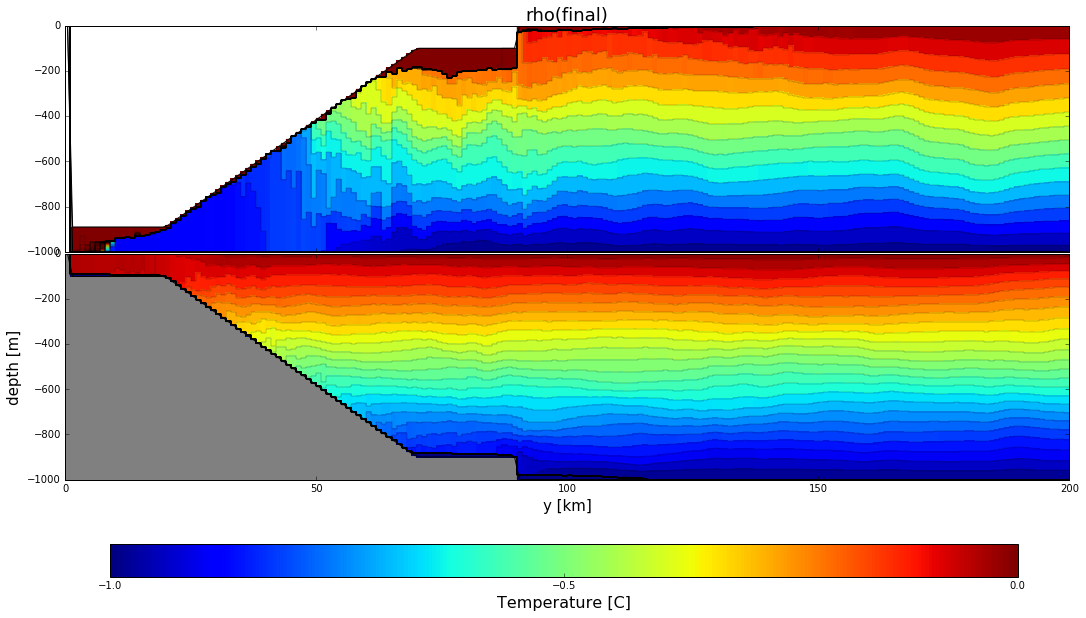

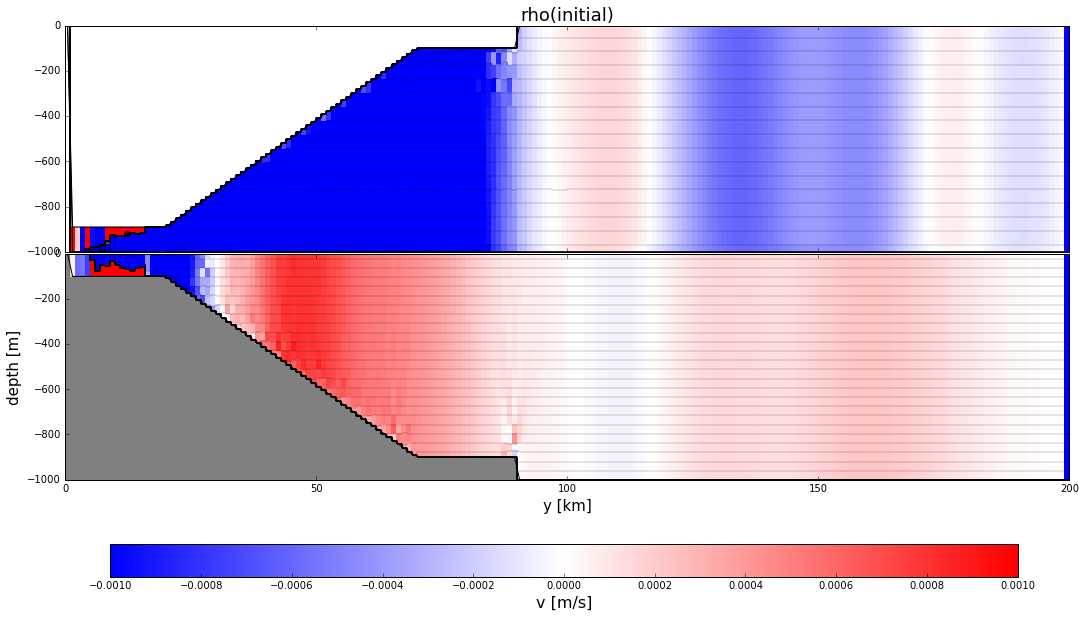

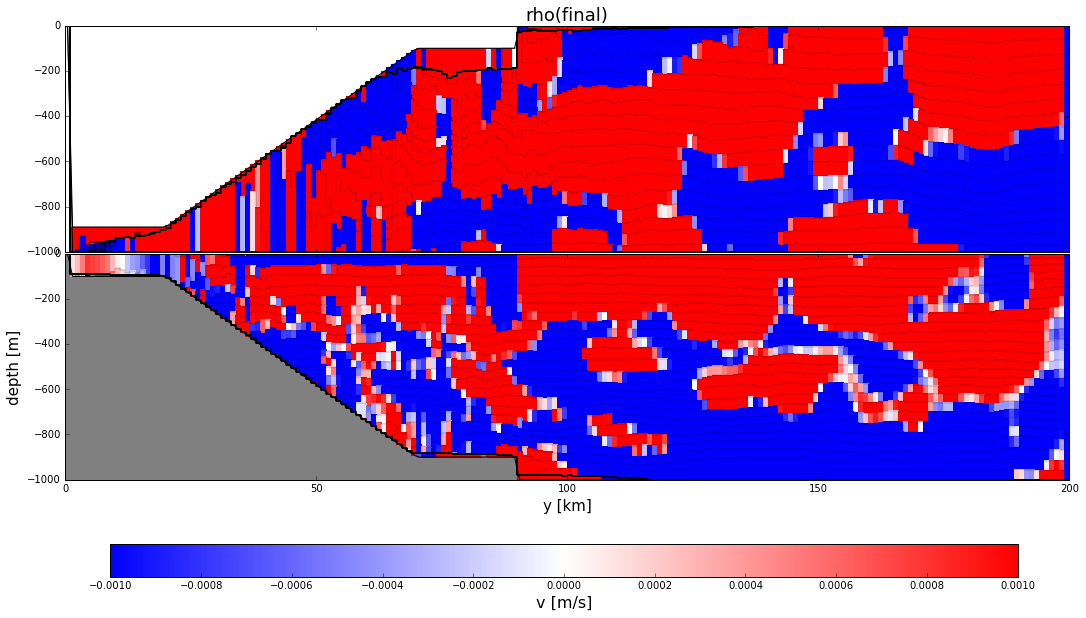

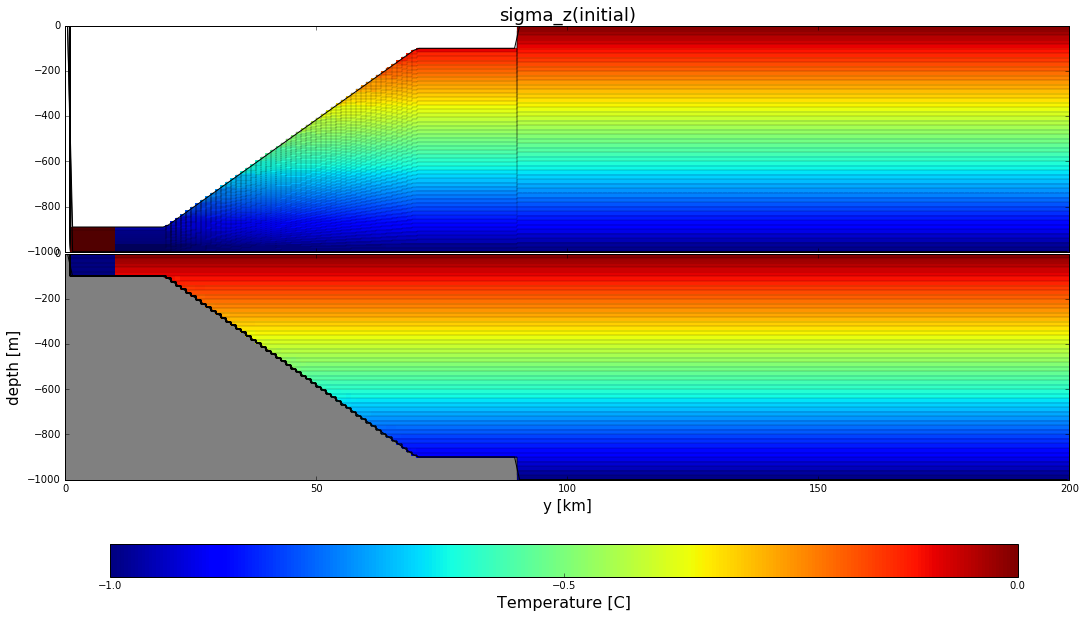

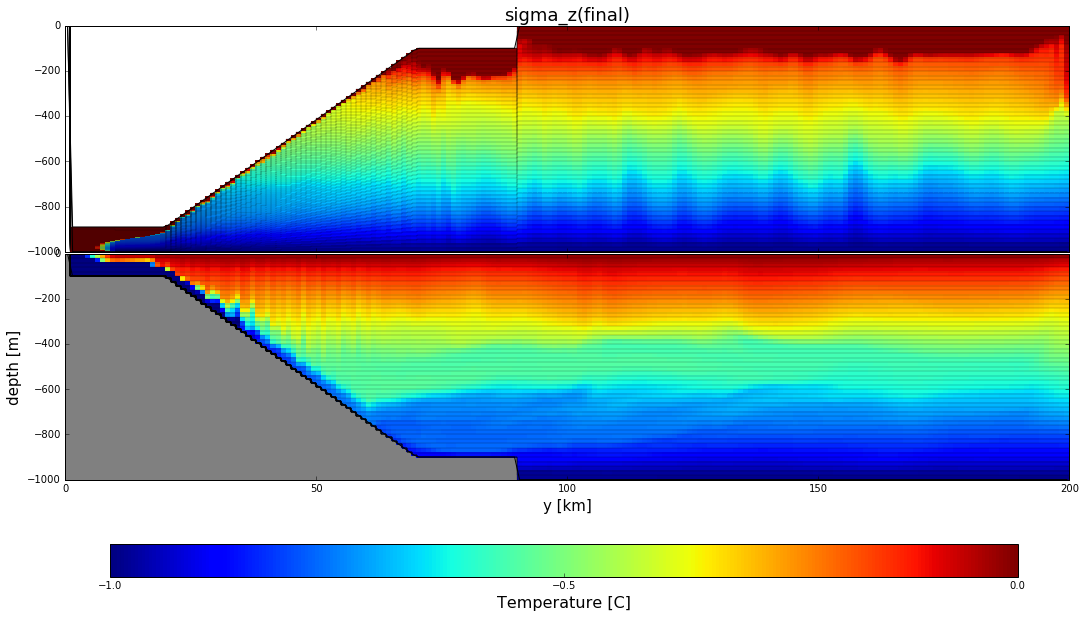

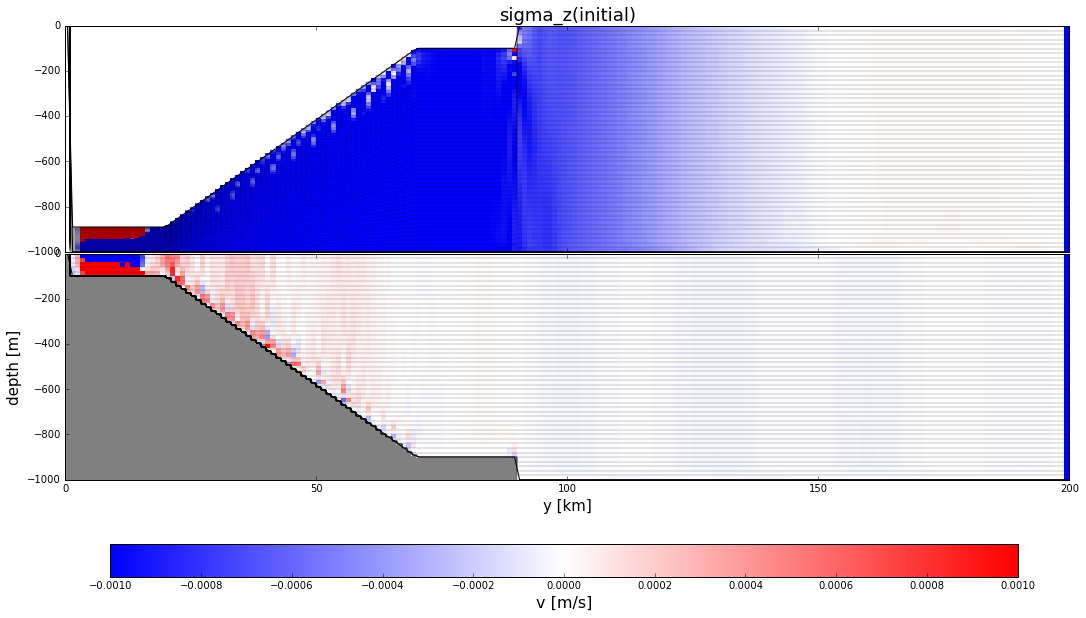

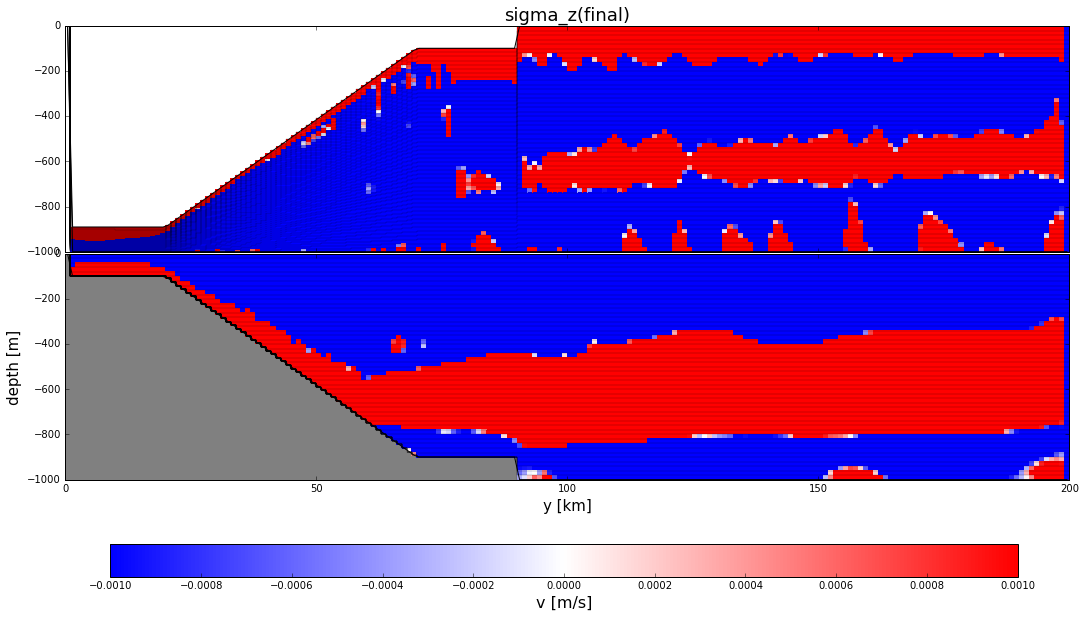

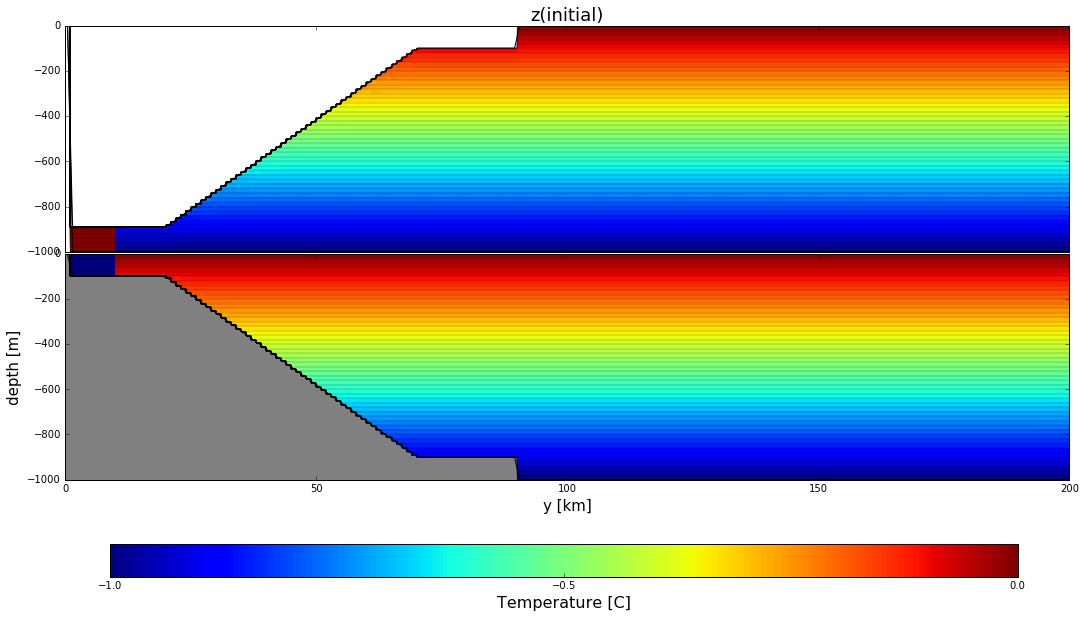

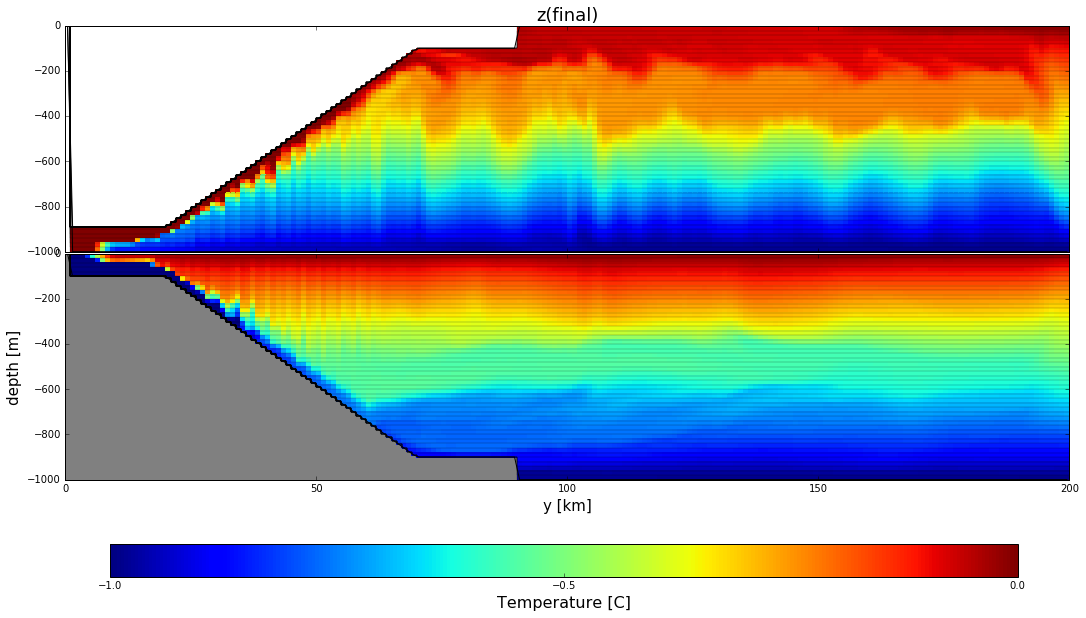

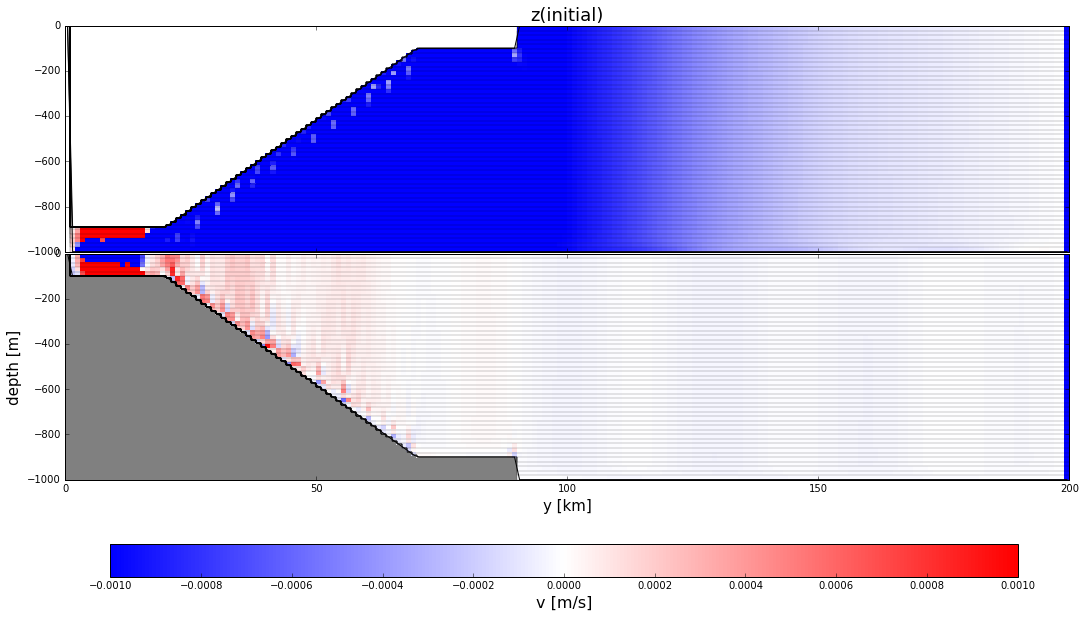

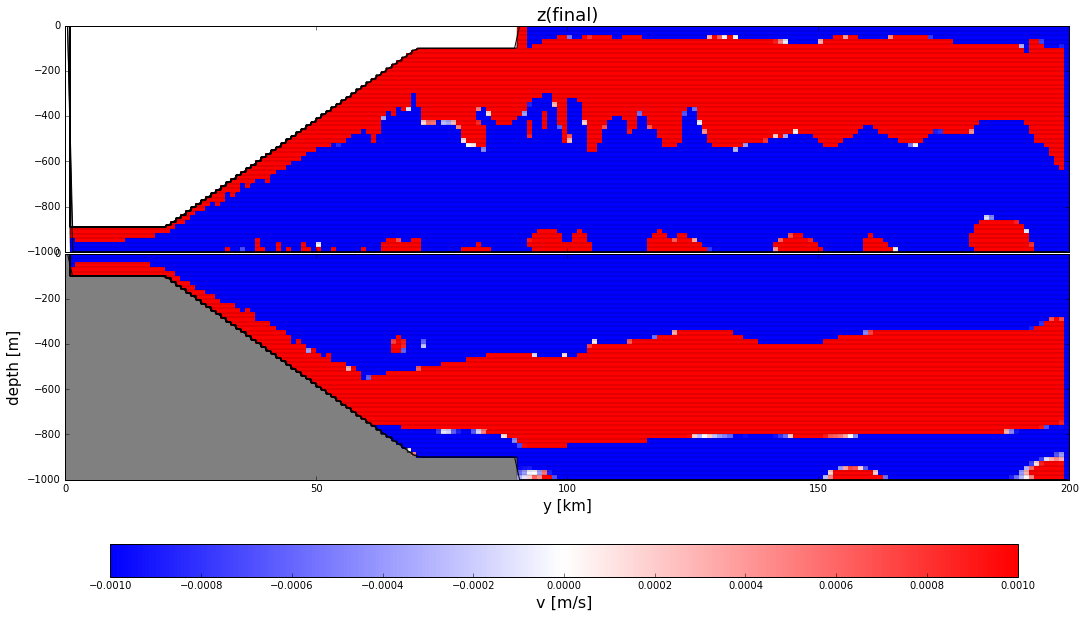

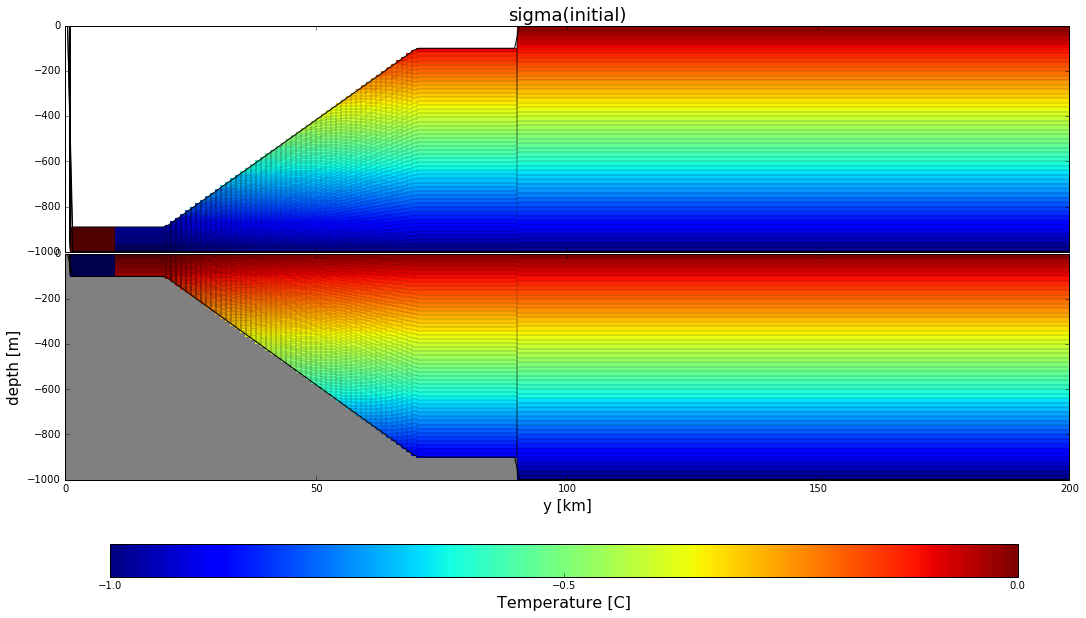

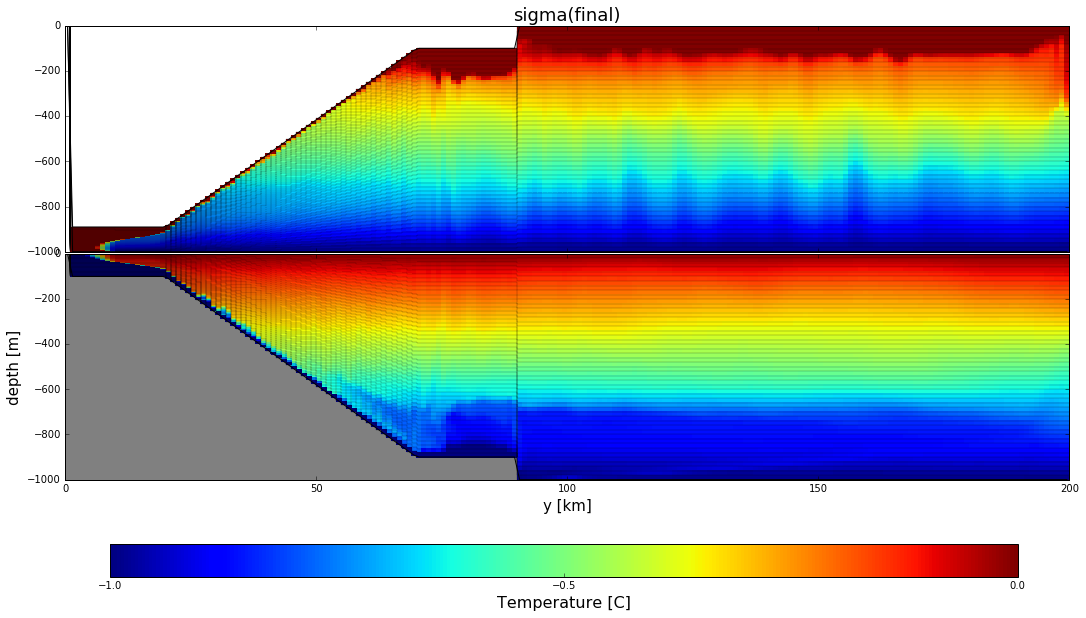

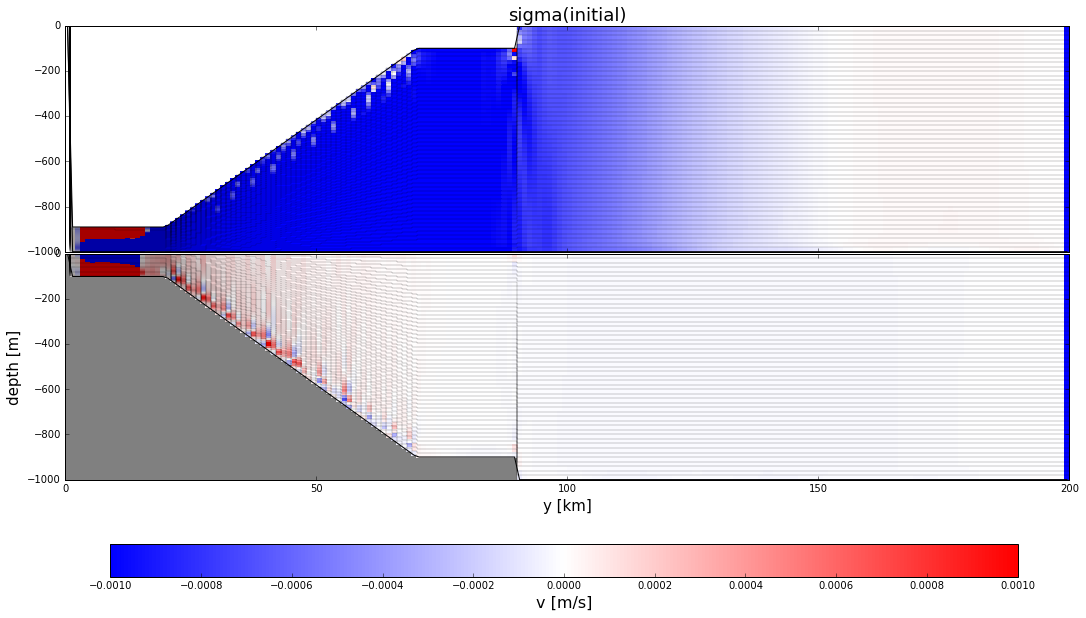

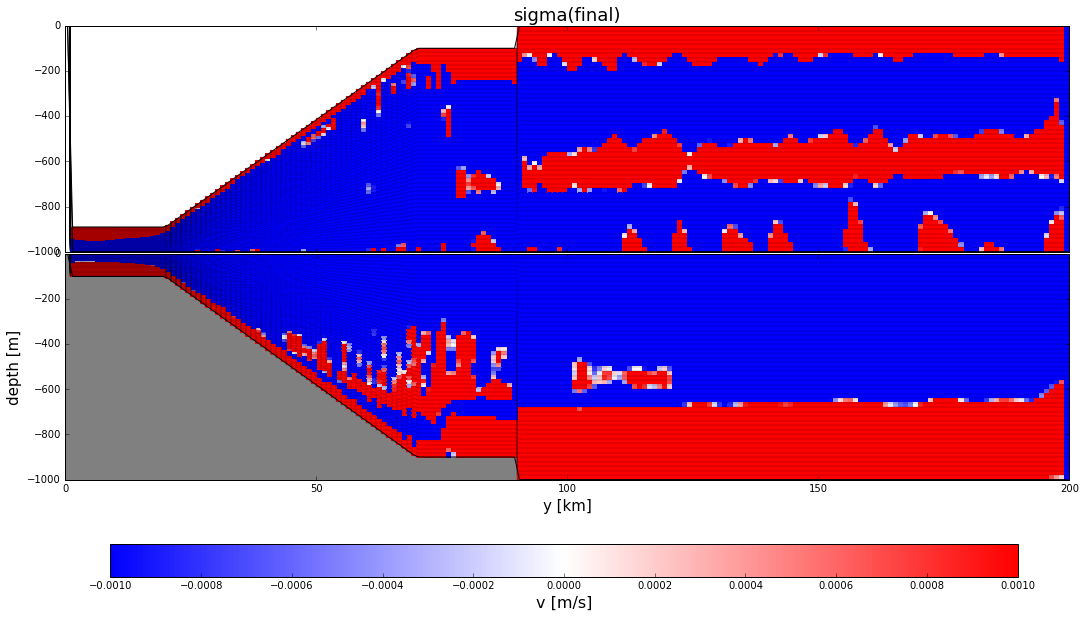

In [1]:
from matplotlib import pyplot as plt
get_ipython().magic(u'matplotlib inline')
import sys
from plotting import *
import netCDF4
import numpy as np

# plot IC
path='/lustre/f1/unswept/Gustavo.Marques/MOM6-examples/ocean_only/outflow_ice_shelf/plume_noBL/'
icfile = 'MOM_IC.nc'
pfile = 'prog.nc'
coords = ['layer','rho','sigma_z','z','sigma']

print 'Initial/Final condition'

for n in range(len(coords)):
   ini_o = netCDF4.Dataset(path+coords[n]+'/outflow/'+icfile)
   ini_i = netCDF4.Dataset(path+coords[n]+'/ice_shelf/'+icfile)
   end_o = netCDF4.Dataset(path+coords[n]+'/outflow/'+pfile)
   end_i = netCDF4.Dataset(path+coords[n]+'/ice_shelf/'+pfile)
   # Read the horizontal coordinate which is the same for all configurations 
   xq = ini_o.variables['latq'][:] # This is the coordinate of the cell corners (u-points in 1D)
   xq = np.concatenate(([0],xq)) # Inserts left most edge of domain in to coordinate
   
   # plot
   fig = plt.figure(figsize=(18,9))
   ax1 = plt.subplot(211); cs1 = plot_section(ini_i, 0, xq, variable='Temp', eta='eta')
   plt.title(coords[n] + '(initial)', fontsize=18)
   plt.tick_params(axis='x',labelbottom='off') 
   ax2 = plt.subplot(212,axisbg='gray'); cs2 = plot_section(ini_o, 0, xq, variable='Temp', eta='eta'); 
   plt.xlabel('y [km]',fontsize=15); plt.ylabel('depth [m]',fontsize=15)
   fig.subplots_adjust(bottom=0.2, hspace=0.01)
   cbar_ax = fig.add_axes([0.16, 0.05, 0.7, 0.05])
   cbar=fig.colorbar(cs1, orientation='horizontal', cax=cbar_ax,ticks=[-1.0,-0.5,0.0])
   cbar.set_label(r'Temperature [C]', fontsize=16)
   #plt.show()

   fig = plt.figure(figsize=(18,9))
   ax1 = plt.subplot(211); cs1 = plot_section(end_i, -1, xq, variable='temp', eta='e',yvar='yh')
   plt.title(coords[n] + '(final)', fontsize=18)
   plt.tick_params(axis='x',labelbottom='off')
   ax2 = plt.subplot(212,axisbg='gray'); cs2 = plot_section(end_o, -1, xq, variable='temp', eta='e',yvar='yh');   
   plt.xlabel('y [km]',fontsize=15); plt.ylabel('depth [m]',fontsize=15)
   fig.subplots_adjust(bottom=0.2, hspace=0.01)
   cbar_ax = fig.add_axes([0.16, 0.05, 0.7, 0.05])
   cbar=fig.colorbar(cs1, orientation='horizontal', cax=cbar_ax,ticks=[-1.0,-0.5,0.0])
   cbar.set_label(r'Temperature [C]', fontsize=16)
   #plt.show()

   # vel
   fig = plt.figure(figsize=(18,9))
   ax1 = plt.subplot(211); cs1 = plot_section(end_i, 0, xq, variable='v', eta='e',yvar='yh',clim=(-1e-3,1e-3), cmap=plt.cm.bwr)
   plt.title(coords[n] + '(initial)', fontsize=18)
   plt.tick_params(axis='x',labelbottom='off')
   ax2 = plt.subplot(212,axisbg='gray'); cs2 = plot_section(end_o, 0, xq, variable='v', eta='e',yvar='yh', clim=(-1e-3,1e-3), cmap=plt.cm.bwr);
   plt.xlabel('y [km]',fontsize=15); plt.ylabel('depth [m]',fontsize=15)
   fig.subplots_adjust(bottom=0.2, hspace=0.01)
   cbar_ax = fig.add_axes([0.16, 0.05, 0.7, 0.05])
   cbar=fig.colorbar(cs2, orientation='horizontal', cax=cbar_ax)
   cbar.set_label(r'v [m/s]', fontsize=16)
   
   fig = plt.figure(figsize=(18,9))
   ax1 = plt.subplot(211); cs1 = plot_section(end_i, -1, xq, variable='v', eta='e',yvar='yh', clim=(-1e-3,1e-3), cmap=plt.cm.bwr)
   plt.title(coords[n] + '(final)', fontsize=18)
   plt.tick_params(axis='x',labelbottom='off')
   ax2 = plt.subplot(212,axisbg='gray'); cs2 = plot_section(end_o, -1, xq, variable='v', eta='e',yvar='yh', clim=(-1e-3,1e-3), cmap=plt.cm.bwr);
   plt.xlabel('y [km]',fontsize=15); plt.ylabel('depth [m]',fontsize=15)
   fig.subplots_adjust(bottom=0.2, hspace=0.01)
   cbar_ax = fig.add_axes([0.16, 0.05, 0.7, 0.05])
   cbar=fig.colorbar(cs2, orientation='horizontal', cax=cbar_ax)
   cbar.set_label(r'v [m/s]', fontsize=16)

# plot_stats
#plt.figure(figsize=(18,9))
#plt.title('Max. absolute vel.')
#for n in range(len(coords)):
#    var_o = netCDF4.Dataset(path+coords[n]+'/outflow/'+pfile)
#    var_i = netCDF4.Dataset(path+coords[n]+'/ice_shelf/'+pfile)   
#    units = var_o.variables['v'].units
#    time = file_handle[i].variables['Time'][:]
#    smin=np.zeros(len(time)); smax=np.zeros(len(time))
#    total=np.zeros(len(time))
#    s = file_handle[i].variables[variable][:]      
#    for t in range(len(time)):
#            smin[t]=s[t,:].min(); smax[t]=s[t,:].max()
#            if smax[t]>=np.abs(smin[t]):
#               total[t]=smax[t]
#               plt.semilogy(time[t],total[t],'+',ms=2)
#            else:
#               total[t]=np.abs(smin[t])
#               plt.semilogy(time[t],total[t],'o',ms=2)

#        plt.plot(time,total,lw=2.0, label=labels[i])
#        plt.legend(loc=0, shadow=True)
#        plt.xlabel('Time') 
#        plt.ylabel(units)

